In [1]:
import numpy as np
import pandas as pd
import covfunctions
from gapp import gp
from gapp import covariance
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Pantheon+SH0ES.dat', delimiter=' ')


In [3]:
#extracting distance modulus, redshift and error bars from the Pantheon data
dm = data['MU_SH0ES'].values
dmerr = data['MU_SH0ES_ERR_DIAG'].values
z = data['zHD'].values

In [4]:
g1 = gp.GaussianProcess(z,dm,dmerr,covfunction=covariance.DoubleSquaredExponential,cXstar=(0.01,2.5,200),thetatrain='False')

In [5]:
rec1, theta1 = g1.gp()

In [6]:
zrec = rec1[:,0]
y_pred = rec1[:,1]
sigma = rec1[:,2]


In [7]:
zpred = np.linspace(0,2.5,200)
print(y_pred)

[33.70411786 34.73501967 35.62753446 36.39089403 37.03586842 37.57437629
 38.01908052 38.38298369 38.67903802 38.91978308 39.11702335 39.2815554
 39.42295228 39.54941007 39.66765847 39.78293493 39.89901877 40.01831968
 40.14201253 40.2702093  40.40215734 40.53645306 40.67125987 40.80451973
 40.93414902 41.05821025 41.17505353 41.28342329 41.38252783 41.47207161
 41.55225174 41.62372234 41.68753151 41.74503691 41.79780681 41.84751357
 41.89582644 41.94431034 41.99433625 42.04700786 42.10310805 42.16306711
 42.22695356 42.29448686 42.3650702  42.43784049 42.51173181 42.58554817
 42.65804084 42.72798595 42.79425778 42.85589401 42.91214974 42.96253766
 43.00685306 43.04518274 43.07789835 43.10563492 43.12925648 43.14981119
 43.16847855 43.18651186 43.20517895 43.22570415 43.24921439 43.27669162
 43.30893376 43.34652528 43.38981857 43.43892614 43.49372352 43.5538621
 43.61879071 43.68778452 43.75997943 43.83441022 43.91005051 43.98585272
 44.06078631 44.1338729  44.20421704 44.27103161 44.3

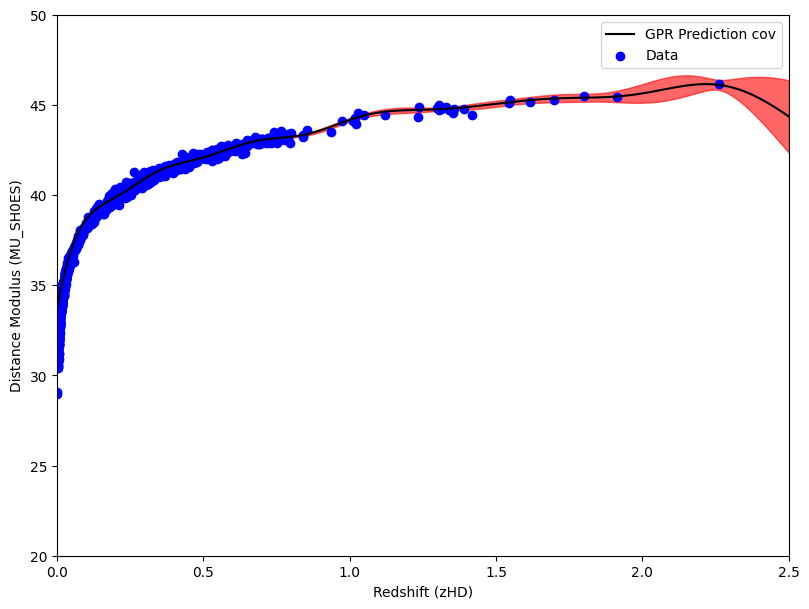

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.ylim(20,50)
plt.xlim(0, 2.5)
plt.tight_layout()
plt.plot(zpred, y_pred, label='GPR Prediction cov', color='black')
#plt.plot(x_pred, y_pred, label='GPR Prediction', color='green')
#plt.plot(x_pred,dl,label = "Lumniosity",color = 'black')
plt.fill_between(zpred.ravel(), y_pred - sigma, y_pred + sigma, color='red', alpha=0.6)
plt.scatter(z, dm, c='b', label='Data')
plt.xlabel('Redshift (zHD)')
plt.ylabel('Distance Modulus (MU_SH0ES)')
plt.legend()
plt.show()
plt.savefig('Pantheon.png', dpi=300, bbox_inches='tight')

In [9]:
cmdc = pd.read_excel("A118.xlsx")
cmdc.head()
cmdi= cmdc[cmdc['z'] < 2.3].copy()
cmd = cmdi.sort_values('z').reset_index(drop=True)
print(cmd)

        GRB       z          Ep (keV) S bolo (10^-5 erg/cm^2)
0   130427A  0.3399     294.25 ± 5.86            31.72 ± 0.20
1   130831A  0.4800      81.35 ± 5.92             1.29 ± 0.07
2     91127  0.4900      60.32 ± 1.93             2.25 ± 0.04
3    100621  0.5400     146.49 ± 23.9             5.75 ± 0.64
4     90424  0.5440     236.91 ± 4.55             5.72 ± 0.09
..      ...     ...               ...                     ...
58   121128  2.2000     243.20 ± 12.8             0.87 ± 0.07
59  120624B  2.2000   1214.47 ± 26.24            20.49 ± 0.25
60   110205  2.2200    740.60 ± 322.0             3.32 ± 0.68
61   130505  2.2700  2063.37 ± 101.37             4.56 ± 0.09
62    60124  2.2960     784.0 ± 285.0             3.40 ± 0.50

[63 rows x 4 columns]


In [10]:
cmd['z'] = pd.to_numeric(cmd['z'], errors='coerce')
cmbdall = cmd['z']
czall = np.array(cmbdall)
print(czall)

[0.3399 0.48   0.49   0.54   0.544  0.6    0.6439 0.68   0.736  0.807
 0.82   0.8969 1.063  1.16   1.17   1.21   1.24   1.29   1.3    1.368
 1.406  1.44   1.44   1.46   1.48   1.48   1.489  1.52   1.547  1.547
 1.563  1.567  1.6    1.604  1.608  1.61   1.619  1.6398 1.69   1.71
 1.73   1.73   1.758  1.77   1.8    1.8    1.822  1.95   1.9685 1.98
 2.01   2.06   2.07   2.09   2.1062 2.14   2.145  2.198  2.2    2.2
 2.22   2.27   2.296 ]


In [11]:
g2 = gp.GaussianProcess(z,dm,dmerr,covfunction=covariance.DoubleSquaredExponential,Xstar=(czall),thetatrain='False')
rec2, theta2 = g2.gp()
yp_all = rec2[:,1]
sig_a = rec2[:,2]

In [14]:
out = np.column_stack((czall, yp_all, sig_a))
np.savetxt("Pantheondist.csv", out, delimiter=",", header="z,mu,sigma_mu", comments="")

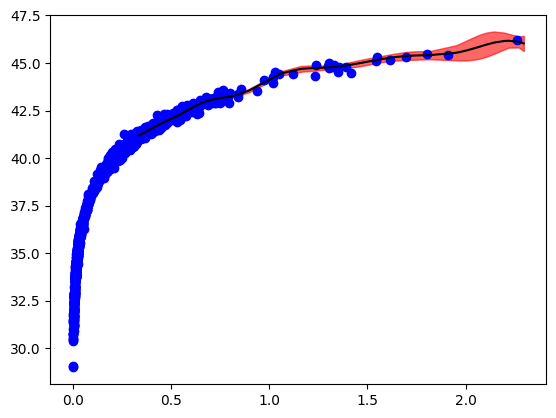

In [12]:
plt.plot(czall, yp_all, label='GPR Prediction cov', color='black')
plt.fill_between(czall.ravel(), yp_all - sig_a, yp_all + sig_a, color='red', alpha=0.6)
plt.scatter(z,dm, c='b', label='Data')

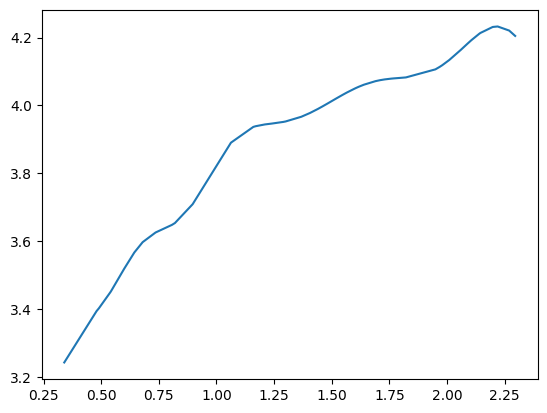

In [13]:
#log of luminosiy distance
dlall = (yp_all - 25) / 5 # Megaparsecs
plt.plot(czall,dlall)
dlerr = (1/5)*sig_a
ld = 10**(dlall)#luminicity distance in MPC
lderr = ld*np.log(10)*dlerr
#print(ld)
ldc = ld*3.085677581e24 #luminicity distance in cm
ldcerr = lderr*3.085677581e24 #Luminicity disnatce error

In [14]:
Ep = cmd['Ep (keV)'].str.split(' ± ').str[0].astype(float)
Eperr = cmd['Ep (keV)'].str.split(' ± ').str[1].astype(float)
Sboloo = cmd['S bolo (10^-5 erg/cm^2)'].str.split(' ± ').str[0].astype(float)
Sberro = cmd['S bolo (10^-5 erg/cm^2)'].str.split(' ± ').str[1].astype(float)
Sbolo = (Sboloo*1e-5) #Bolometric flux in erg/cm^2
Sberr = (Sberro*1e-5)#Bolomrtric Flux error in erg/cm^2


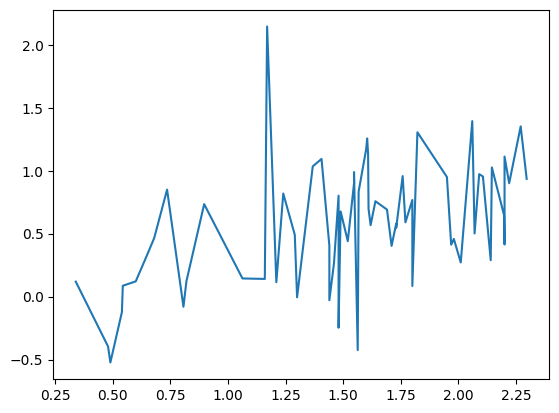

In [15]:
Eprest = Ep * (1 + czall)# Convert to rest-frame
Epresterr = Eperr*(1+czall)
xi = np.log10(Eprest/300)
sigma_xi = Epresterr / (np.log(10) * Eprest)
plt.plot(czall,xi)

In [16]:
eisono = 4*np.pi *(ldc**2) *Sbolo
eisodeno = 1 + czall
eiso = eisono/eisodeno #Eisotropic Energy in erg

In [17]:
yi = np.log10(eiso)
print(yi)
#sigma_yi = np.sqrt((2 * ldcerr / ldc)**2 +(Sberr / Sbolo)**2) / np.log(10)
sigma_yi = Sberr / (np.log(10) *Sbolo)
print(xi)
print(sigma_yi)

0     52.938451
1     51.807107
2     52.062115
3     52.550337
4     52.555585
        ...    
58    52.974828
59    54.346851
60    53.556381
61    53.663452
62    53.500925
Name: S bolo (10^-5 erg/cm^2), Length: 63, dtype: float64
0     0.118668
1    -0.396502
2    -0.523474
3    -0.123793
4     0.086109
        ...   
58    0.413992
59    1.112416
60    0.900318
61    1.352004
62    0.935182
Name: Ep (keV), Length: 63, dtype: float64
0     0.002738
1     0.023566
2     0.007721
3     0.048339
4     0.006833
        ...   
58    0.034943
59    0.005299
60    0.088952
61    0.008572
62    0.063867
Name: S bolo (10^-5 erg/cm^2), Length: 63, dtype: float64


In [20]:
import emcee
import corner

def log_amati_likelihood(theta, xi, yi, sigma_xi, sigma_yi):
    
    a, b, sigma_ext = theta  

    # Total uncertainty (including intrinsic scatter)
    sigma_tot_i = np.sqrt(sigma_ext**2 + sigma_yi**2 + (b**2) * sigma_xi**2)
    
    # Log-likelihood calculation
    residuals = yi - (a + b * xi)
    log_likelihood = -0.5 * np.sum((residuals ** 2) / sigma_tot_i**2 + np.log(2 * np.pi * sigma_tot_i**2))
    
    return log_likelihood

# Define Priors
def log_prior(theta):
    a, b, sigma_ext = theta
    if 50 < a < 60 and 0.5 < b < 1.5 and 0 < sigma_ext < 5:
        return 0.0  # Uniform prior
    return -np.inf  # Log of zero probability

# Log-Probability Function (Log Prior + Log Likelihood)
def log_probability(theta, xi, yi, sigma_xi, sigma_yi):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_amati_likelihood(theta, xi, yi, sigma_xi, sigma_yi)


# MCMC Setup
n_walkers = 32
n_dim = 3  # Parameters: a, b, sigma_ext
np.random.seed(42)

# Initialize Walkers
initial = np.array([55, 1.0, 2.0])  # Initial guess for (a, b, sigma_ext)
pos = initial + 1e-4 * np.random.randn(n_walkers, n_dim)

# Set up the sampler
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_probability, args=(xi, yi, sigma_xi, sigma_yi))

# Run MCMC
n_steps = 10000
sampler.run_mcmc(pos, n_steps, progress=True)

# Extract Samples
samples = sampler.get_chain(discard=1000, flat=True)
a_fit, b_fit, sigma_ext_fit = np.median(samples, axis=0)

# Print Results
print(f"Best fit: a = {a_fit:.3f}, b = {b_fit:.3f}, sigma_ext = {sigma_ext_fit:.3f}")

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [11:51<00:00, 14.06it/s]


Best fit: a = 52.502, b = 1.106, sigma_ext = 0.440
